<a href="https://colab.research.google.com/github/Amit2balag/Scaler-Projects/blob/main/Assignment_Task_ML_Engineer_Data_Scientist_TensorIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorIoT -
TensorIoT is an AWS Advanced Consulting Partner. Founded by Amazon (AWS) and
Google engineers, we focus on IoT, AI and Server less solutions. We help
companies realize the value and efficiency of the AWS ecosystem. From building
PoCs and MVPs to production-ready applications, leveraging our deep AI/ML
expertise, our teams rapidly deploy impactful solutions for our customers.

#Bussiness Case Briefing

A client has data on users for an application from the past two years. They define an "adopted user" as a user who has logged into the application on three separate days in at least one seven- day period. They want to understand what variables contribute to a user converting into an adopted user. The assignment is to inspect the data and prepare an analysis that shows non-technical stakeholders what variables and conditions are associated with user adoption.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Overview
The data is available as two attached CSV files:
1. takehome_user_engagement.csv
2. takehome_users.csv

The data has the following two tables:
1. **A user table ("takehome_users")** with data on 12,000 users who signed up for the product in the last two years. This table includes:
- name: the user's name
- object_id: the user's id
- email: email address
- creation_source: how their account was created. This takes on one of 5 values:
 - PERSONAL_PROJECTS: invited to join another user's personal workspace
 - GUEST_INVITE: invited to an organization as a guest (limited permissions)
 - ORG_INVITE: invited to an organization (as a full member)
 - SIGNUP: signed up via the website
 - SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a
Google email account for their login id)
- creation_time: when they created their account
- last_session_creation_time: unix timestamp of last login
- opted_in_to_mailing_list: whether they have opted into receiving marketing emails
- enabled_for_marketing_drip: whether they are on the regular marketing email
drip
- org_id: the organization (group of users) they belong to
- invited_by_user_id: which user invited them to join (if applicable)

2. **A usage summary table ("takehome_user_engagement")** that has a row for each day that
a user logged into the product.

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/takehome_user_engagement 1.csv')
df1

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


#Checking the basic info
- DataTypes
- Null values
- Overall shape

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])

In [6]:
df1.nunique()

time_stamp    207220
user_id         8823
visited            1
dtype: int64

In [7]:
min(df1['time_stamp']), max(df1['time_stamp'])

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [8]:
df1.describe(include = 'all')

,time_stamp,user_id,visited
count,207917,207917.000000,207917.0
mean,2013-10-30 05:06:45.648763648,5913.314197,1.0
min,2012-05-31 08:20:06,1.000000,1.0
25%,2013-07-16 20:17:21,3087.000000,1.0
50%,2013-12-03 06:38:34,5682.000000,1.0
75%,2014-03-13 08:00:24,8944.000000,1.0
max,2014-06-06 14:58:50,12000.000000,1.0
std,NaN,3394.941674,0.0


In [9]:
# df1['time_stamp'] = pd.to_datetime(df1['time_stamp'])
# df1['time_stamp']

In [10]:
(df1.isna().sum()/len(df1))*100 ## to reinforce the Null value infomration

time_stamp    0.0
user_id       0.0
visited       0.0
dtype: float64

In [11]:
print(df1.corr())

            time_stamp   user_id  visited
time_stamp    1.000000  0.001345      NaN
user_id       0.001345  1.000000      NaN
visited            NaN       NaN      NaN


#Findings -
- Data has no Null values
- Dataset is in appropiated datatype format except datetime. I have changed it's type here.
- Summary dataset has a record for 8823 users dated between '2012-05-31 08:20:06' to '2014-06-06 14:58:50' on which users have logged into the app.

#adopted_user
**adopted_user** as a user who has logged into the application on three separate days in at least one seven-
day period.

In [12]:
def is_adopted(group):
    time_diff = group.diff().dt.days.fillna(0)
    time_diff_int = time_diff.where(time_diff.notna(), 0).astype(int)
    return any((time_diff_int <= 7).rolling(window=3).sum() >= 3)

adopted_users = df1.groupby('user_id')['time_stamp'].apply(is_adopted)
df1['adopted_user'] = adopted_users.astype(int)
df1['adopted_user'].fillna(0, inplace=True)

df1['login_frequency'] = df1.groupby('user_id')['visited'].transform('sum')
df1['adopted_user'] = df1['adopted_user'].astype(int)
df1

,time_stamp,user_id,visited,adopted_user,login_frequency
0,2014-04-22 03:53:30,1,1,0,1
1,2013-11-15 03:45:04,2,1,0,14
2,2013-11-29 03:45:04,2,1,1,14
3,2013-12-09 03:45:04,2,1,0,14
4,2013-12-25 03:45:04,2,1,0,14
...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,0,1
207913,2013-01-15 18:28:37,11997,1,0,1
207914,2014-04-27 12:45:16,11998,1,0,1
207915,2012-06-02 11:55:59,11999,1,0,1


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   time_stamp       207917 non-null  datetime64[ns]
 1   user_id          207917 non-null  int64         
 2   visited          207917 non-null  int64         
 3   adopted_user     207917 non-null  int64         
 4   login_frequency  207917 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.9 MB


In [14]:
df1['adopted_user'].value_counts()

adopted_user
0    206259
1      1658
Name: count, dtype: int64

In [15]:
A = pd.DataFrame(df1.groupby(['user_id'])['adopted_user'].value_counts().sort_values(ascending=False))
A.head(60)

,,count
user_id,adopted_user,
3623,0,606
906,0,600
1811,0,593
7590,0,590
8068,0,585
9402,0,581
4022,0,580
3269,0,566
9312,0,547


In [16]:
A.tail(60)

,,count
user_id,adopted_user,
4764,0,1
4761,0,1
4710,0,1
4706,0,1
4604,0,1
4705,0,1
4658,0,1
4656,0,1
4654,0,1


Here we can bin the user_ids based on their count of loin instances & then we can how does the data performs to take a call but for now let's see the second dataframe.

In [17]:
df2 = pd.read_csv('/content/drive/MyDrive/takehome_users 2.csv', encoding='latin-1')
df2

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


Prima-facie based on the brief given in the data overview section **Object_id** & **user_ids** aret he saem therefore these can be transformed to either on one name.

In [18]:
df2.rename(columns={'object_id': 'user_id'}, inplace=True)
df2

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


**DataType Tranformation**

In [20]:
df2['creation_time'] = pd.to_datetime(df2['creation_time'])
df2['last_session_creation_time'] = pd.to_datetime(df2['last_session_creation_time'], unit='s')

In [21]:
df2.head(2)

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0


In [22]:
print(min(df2['creation_time']), max(df2['creation_time'])),
print(min(df2['last_session_creation_time']), max(df2['last_session_creation_time']))

2012-05-31 00:43:27 2014-05-30 23:59:19
2012-05-31 08:20:06 2014-06-06 14:58:50


In [23]:
# df2.describe(include = 'all')
df2.describe()

,user_id,creation_time,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,12000,8823,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,2013-07-16 13:25:32.964499968,2013-09-15 21:08:25.700441856,0.249500,0.149333,141.884583,5962.957145
min,1.00000,2012-05-31 00:43:27,2012-05-31 08:20:06,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,2013-01-15 21:28:22.750000128,2013-03-13 17:16:05,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,2013-08-05 21:35:19.500000,2013-10-27 15:41:10,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,2014-01-28 10:20:12.249999872,2014-04-25 16:16:44,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,2014-05-30 23:59:19,2014-06-06 14:58:50,1.000000,1.000000,416.000000,11999.000000
std,3464.24595,NaN,NaN,0.432742,0.356432,124.056723,3383.761968


In [24]:
df = pd.merge(df1, df2, on='user_id', how='left')
df

,time_stamp,user_id,visited,adopted_user,login_frequency,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1,1,0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2013-11-15 03:45:04,2,1,0,14,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,2013-11-29 03:45:04,2,1,1,14,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-12-09 03:45:04,2,1,0,14,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
4,2013-12-25 03:45:04,2,1,0,14,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207912,2013-09-06 06:14:15,11996,1,0,1,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0
207913,2013-01-15 18:28:37,11997,1,0,1,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN
207914,2014-04-27 12:45:16,11998,1,0,1,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0
207915,2012-06-02 11:55:59,11999,1,0,1,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN


In [25]:
print(df1.shape, df2.shape)
print(df.shape)

(207917, 5) (12000, 10)
(207917, 14)


In [26]:
df = df.sort_values(by='login_frequency', ascending=False)
df

,time_stamp,user_id,visited,adopted_user,login_frequency,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
63264,2014-03-30 14:34:33,3623,1,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63206,2014-01-26 14:34:33,3623,1,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63213,2014-02-04 14:34:33,3623,1,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63212,2014-02-01 14:34:33,3623,1,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63211,2014-01-31 14:34:33,3623,1,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135718,2013-11-06 16:18:52,7715,1,0,1,2013-11-06 16:18:52,Mehler Daniel,DanielMehler@jourrapide.com,ORG_INVITE,2013-11-06 16:18:52,0,0,32,10791.0
135721,2014-05-13 04:15:04,7717,1,0,1,2014-05-13 04:15:04,Finkel Jennifer,JenniferFinkel@yahoo.com,ORG_INVITE,2014-05-13 04:15:04,0,0,20,7976.0
135722,2012-11-11 07:09:11,7718,1,0,1,2012-11-10 07:09:11,Gomez Anderson,AndersonGGomez@gustr.com,GUEST_INVITE,2012-11-11 07:09:11,0,0,120,6316.0
135925,2014-01-21 12:33:27,7721,1,0,1,2014-01-19 12:33:27,Kneebone Lara,LaraKneebone@cuvox.de,SIGNUP,2014-01-21 12:33:27,1,0,149,NaN


In [27]:
df['visited'].value_counts()

visited
1    207917
Name: count, dtype: int64

since this entire dataset is all about visited users we can delete the coloumn as the same is not going to add value to the analytics.

In [28]:
df.drop(columns = ['visited'], inplace = True)
df

,time_stamp,user_id,adopted_user,login_frequency,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
63264,2014-03-30 14:34:33,3623,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63206,2014-01-26 14:34:33,3623,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63213,2014-02-04 14:34:33,3623,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63212,2014-02-01 14:34:33,3623,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
63211,2014-01-31 14:34:33,3623,0,606,2012-06-25 14:34:33,Melo Vitória,VitoriaAlvesMelo@jourrapide.com,ORG_INVITE,2014-05-27 14:34:33,0,0,364,3623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135718,2013-11-06 16:18:52,7715,0,1,2013-11-06 16:18:52,Mehler Daniel,DanielMehler@jourrapide.com,ORG_INVITE,2013-11-06 16:18:52,0,0,32,10791.0
135721,2014-05-13 04:15:04,7717,0,1,2014-05-13 04:15:04,Finkel Jennifer,JenniferFinkel@yahoo.com,ORG_INVITE,2014-05-13 04:15:04,0,0,20,7976.0
135722,2012-11-11 07:09:11,7718,0,1,2012-11-10 07:09:11,Gomez Anderson,AndersonGGomez@gustr.com,GUEST_INVITE,2012-11-11 07:09:11,0,0,120,6316.0
135925,2014-01-21 12:33:27,7721,0,1,2014-01-19 12:33:27,Kneebone Lara,LaraKneebone@cuvox.de,SIGNUP,2014-01-21 12:33:27,1,0,149,NaN


In [29]:
# bin_edges = [-1, 10, 50, 100, 200, 400, float('inf')]
# bin_labels = [1, 2, 3, 4, 4, 5]
# df['login_frequency_bin'] = pd.cut(df['login_frequency'], bins=bin_edges, labels=bin_labels, include_lowest=True, ordered=False)
# df

In [30]:
df['adopted_user'].value_counts()

adopted_user
0    206259
1      1658
Name: count, dtype: int64

In [31]:
A = df.groupby(['adopted_user'])['login_frequency'].mean()
A

adopted_user
0    256.069262
1    227.291315
Name: login_frequency, dtype: float64

creation_source
ORG_INVITE            70091
GUEST_INVITE          46796
SIGNUP                37545
SIGNUP_GOOGLE_AUTH    34263
PERSONAL_PROJECTS     19222
Name: count, dtype: int64


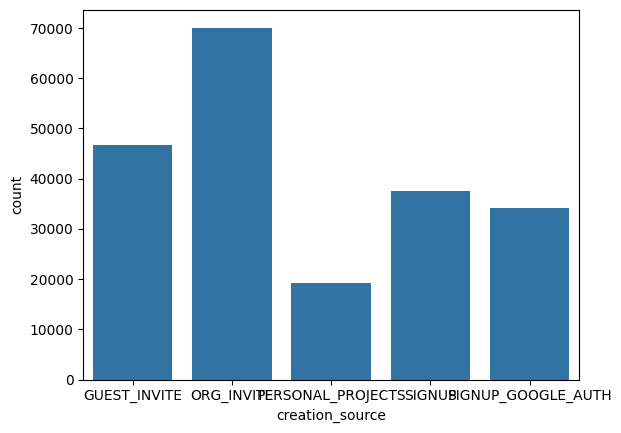

In [32]:
print(df['creation_source'].value_counts())
sns.countplot(data=df.sort_values(by='creation_source'), x='creation_source')
plt.show()

In [33]:
A = df.groupby(['creation_source', 'adopted_user'])['login_frequency'].mean().reset_index()
A

,creation_source,adopted_user,login_frequency
0,GUEST_INVITE,0,270.853955
1,GUEST_INVITE,1,257.731076
2,ORG_INVITE,0,248.380009
3,ORG_INVITE,1,193.964883
4,PERSONAL_PROJECTS,0,230.149522
5,PERSONAL_PROJECTS,1,96.836066
6,SIGNUP,0,238.381847
7,SIGNUP,1,238.862295
8,SIGNUP_GOOGLE_AUTH,0,285.573362
9,SIGNUP_GOOGLE_AUTH,1,274.567708


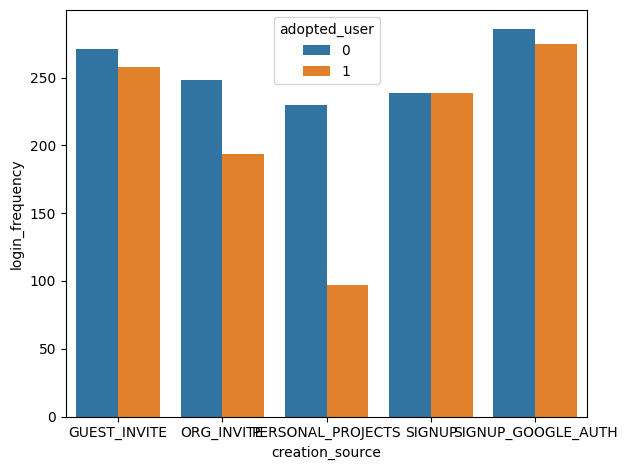

In [34]:
sns.barplot(data=A, x='creation_source', y='login_frequency', hue='adopted_user')
plt.tight_layout()
plt.show()

In [35]:
A = df.groupby(['user_id', 'name', 'email'])['login_frequency'].mean().reset_index()
A

,user_id,name,email,login_frequency
0,1,Clausen August,AugustCClausen@yahoo.com,1.0
1,2,Poole Matthew,MatthewPoole@gustr.com,14.0
2,3,Bottrill Mitchell,MitchellBottrill@gustr.com,1.0
3,4,Clausen Nicklas,NicklasSClausen@yahoo.com,1.0
4,5,Raw Grace,GraceRaw@yahoo.com,1.0
...,...,...,...,...
8818,11996,Meier Sophia,SophiaMeier@gustr.com,1.0
8819,11997,Fisher Amelie,AmelieFisher@gmail.com,1.0
8820,11998,Haynes Jake,JakeHaynes@cuvox.de,1.0
8821,11999,Faber Annett,mhaerzxp@iuxiw.com,1.0


In [36]:
print('unique Value :', df['user_id'].nunique(), df['name'].nunique(), df['email'].nunique())
print('null value check :', df[['user_id', 'name', 'email']].isna().sum())

unique Value : 8823 8453 8810
null value check : user_id    0
name       0
email      0
dtype: int64


it denotes that there might be duplicacy in name & user id with respect to emails. There can two possibilities
1. Resistration was done again
2. There was change in the user name as well in the given course of time.
3. issue in the way name is stored in the dataset.

In [37]:
df['name'] = df['name'].str.lower()
df['name'].nunique()

8453

In [38]:
email_name_counts = df.groupby('email')['name'].nunique()
email_with_multiple_names = pd.DataFrame(email_name_counts[email_name_counts > 1])
email_with_multiple_names

,name
email,


In [39]:
email_name_counts = df.groupby('email')['user_id'].nunique()
email_with_multiple_user_id = pd.DataFrame(email_name_counts[email_name_counts > 1])
email_with_multiple_user_id.shape

(13, 1)

In [40]:
name_name_counts = df.groupby('name')['user_id'].nunique()
name_with_multiple_user_id = pd.DataFrame(name_name_counts[name_name_counts > 1])
name_with_multiple_user_id.shape

(336, 1)

Herein we have two conclusions that
1. there are 13 emails that have been resisted again means as case of adoption.
2. There are 336 user_ids created again for the same name(adoption case).

In [41]:
df = df.sort_values(by='time_stamp', ascending=False)
df

,time_stamp,user_id,adopted_user,login_frequency,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
70763,2014-06-06 14:58:50,4051,0,1,2014-05-29 14:58:50,holm alexander,AlexanderOHolm@gustr.com,ORG_INVITE,2014-06-06 14:58:50,0,1,47,5340.0
6053,2014-06-04 23:56:26,341,0,108,2013-08-07 23:56:26,bentley katie,KatieBentley@gustr.com,GUEST_INVITE,2014-06-04 23:56:26,1,1,2,9323.0
168409,2014-06-04 23:46:31,9558,0,237,2012-10-05 23:46:31,christiansen anders,jzxqmman@pjcjm.com,SIGNUP,2014-06-04 23:46:31,0,0,80,NaN
162633,2014-06-04 23:34:04,9325,0,418,2012-09-28 23:34:04,taylor steven,StevenFTaylor@gmail.com,SIGNUP_GOOGLE_AUTH,2014-06-04 23:34:04,0,0,252,NaN
84316,2014-06-04 23:32:13,4625,0,111,2013-02-17 23:32:13,wannemaker tim,goyfedfr@sqclx.com,ORG_INVITE,2014-06-04 23:32:13,0,0,0,8927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109716,2012-06-01 00:17:30,6102,0,2,2012-06-01 00:17:30,morrison natasha,NatashaMorrison@gustr.com,ORG_INVITE,2012-06-15 00:17:30,0,0,34,6102.0
26821,2012-05-31 21:58:33,1693,0,289,2012-05-31 21:58:33,faulkner hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,2014-05-12 21:58:33,0,1,50,NaN
175638,2012-05-31 17:19:37,9899,0,1,2012-05-31 17:19:37,jørgensen sofie,SofieNJrgensen@yahoo.com,ORG_INVITE,2012-05-31 17:19:37,0,0,138,9899.0
59486,2012-05-31 15:47:36,3428,0,14,2012-05-31 15:47:36,spears arthur,ArthurJSpears@gmail.com,SIGNUP_GOOGLE_AUTH,2012-11-13 15:47:36,1,0,166,NaN


##Analysis on the login time based time stamp

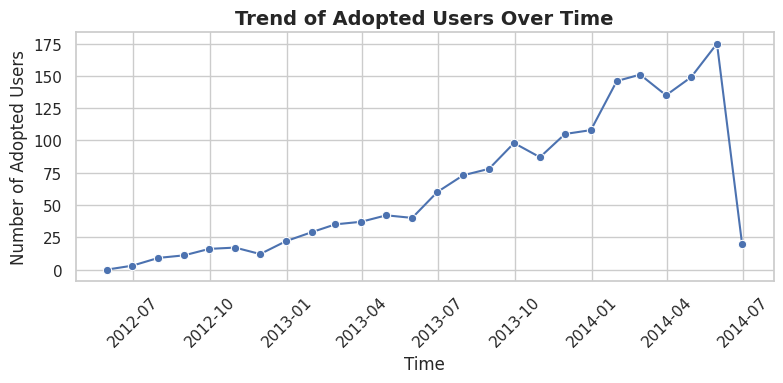

In [42]:
adopted_users_count = df.groupby(pd.Grouper(key='time_stamp', freq='M'))['adopted_user'].sum()

plt.figure(figsize=(8, 4))
sns.set(style='whitegrid')
sns.lineplot(x=adopted_users_count.index, y=adopted_users_count.values, marker='o')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.title('Trend of Adopted Users Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

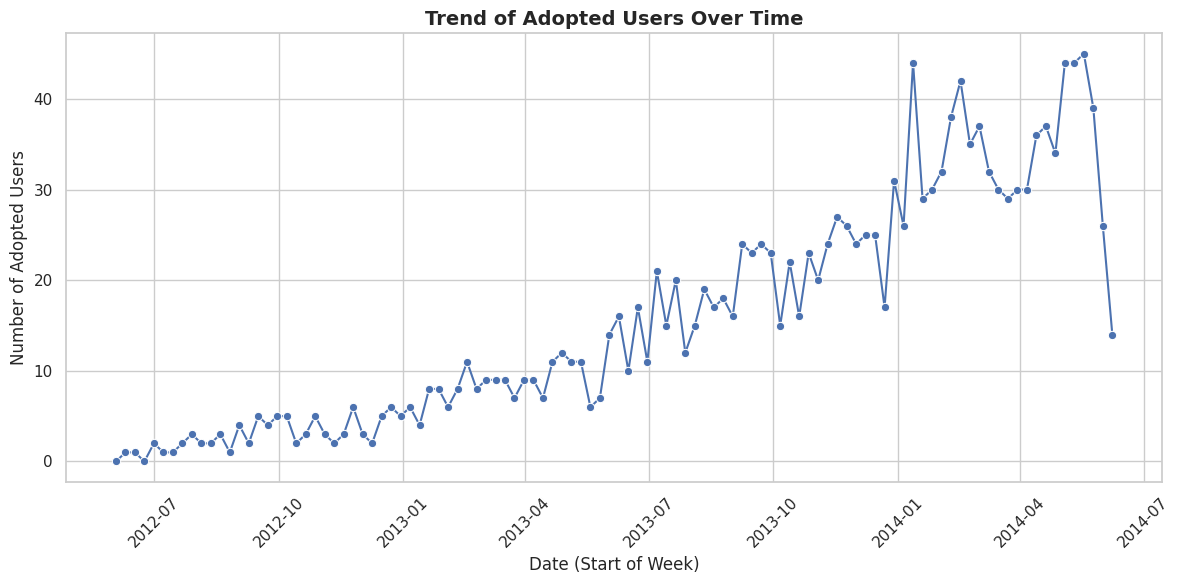

In [43]:
adopted_users_count = df.groupby(pd.Grouper(key='time_stamp', freq='W'))['adopted_user'].sum()

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.lineplot(x=adopted_users_count.index, y=adopted_users_count.values, marker='o')
plt.xlabel('Date (Start of Week)', fontsize=12)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.title('Trend of Adopted Users Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

#Analysis on the creation_time based timestamp

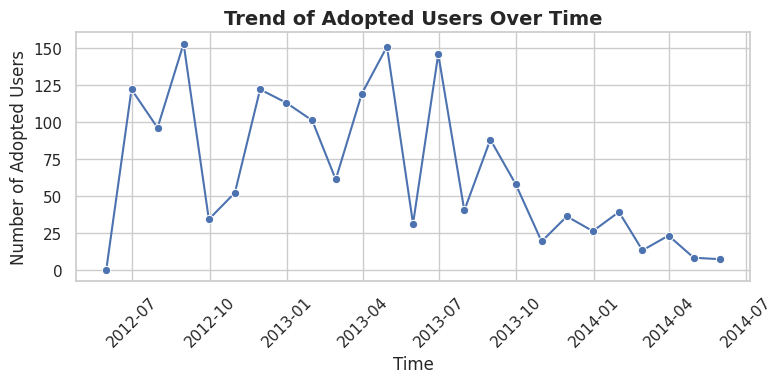

In [44]:
adopted_users_count = df.groupby(pd.Grouper(key='creation_time', freq='M'))['adopted_user'].sum()

plt.figure(figsize=(8, 4))
sns.set(style='whitegrid')
sns.lineplot(x=adopted_users_count.index, y=adopted_users_count.values, marker='o')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.title('Trend of Adopted Users Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

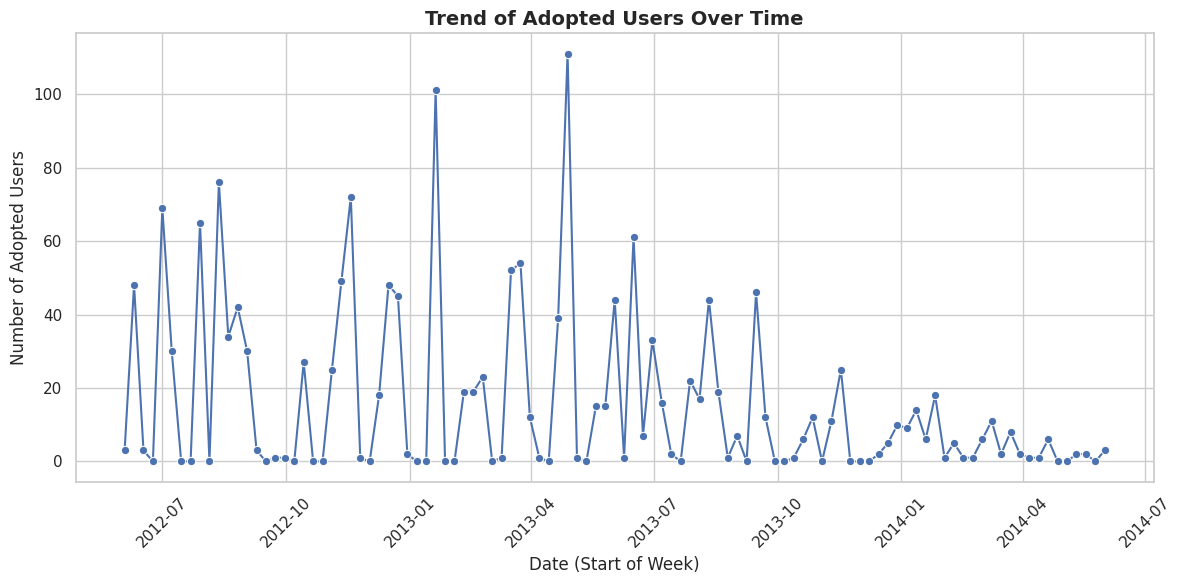

In [45]:
adopted_users_count = df.groupby(pd.Grouper(key='creation_time', freq='W'))['adopted_user'].sum()

plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
sns.lineplot(x=adopted_users_count.index, y=adopted_users_count.values, marker='o')
plt.xlabel('Date (Start of Week)', fontsize=12)
plt.ylabel('Number of Adopted Users', fontsize=12)
plt.title('Trend of Adopted Users Over Time', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Here we ca clearly see a better ganularity on week insteed of months.Let's create features accordingly.

In [46]:
df['creation_time_month'] = df['creation_time'].dt.month
df['creation_time_week'] = df['creation_time'].dt.isocalendar().week
df['time_stamp_month'] = df['time_stamp'].dt.month
df['time_stamp_week'] = df['time_stamp'].dt.isocalendar().week
df['last_session_creation_time_month'] = df['last_session_creation_time'].dt.month
df['last_session_creation_timeweek'] = df['last_session_creation_time'].dt.isocalendar().week


In [47]:
def week_of_month(date):
    first_day_of_month = date.replace(day=1)
    if first_day_of_month.weekday() != 6:
        adjusted_date = first_day_of_month + pd.Timedelta(days=(6 - first_day_of_month.weekday()))
    else:
        adjusted_date = first_day_of_month
    return (date.day + adjusted_date.weekday() - 1) // 7 + 1

df['last_session_creation_time_month'] = df['creation_time'].apply(week_of_month)
df['time_stamp_WeekOfMonth'] = df['time_stamp'].apply(week_of_month)
df['last_session_creation_time_month'] = df['last_session_creation_time'].apply(week_of_month)
df

,time_stamp,user_id,adopted_user,login_frequency,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_month,creation_time_week,time_stamp_month,time_stamp_week,last_session_creation_time_month,last_session_creation_timeweek,time_stamp_WeekOfMonth
70763,2014-06-06 14:58:50,4051,0,1,2014-05-29 14:58:50,holm alexander,AlexanderOHolm@gustr.com,ORG_INVITE,2014-06-06 14:58:50,0,1,47,5340.0,5,22,6,23,2,23,2
6053,2014-06-04 23:56:26,341,0,108,2013-08-07 23:56:26,bentley katie,KatieBentley@gustr.com,GUEST_INVITE,2014-06-04 23:56:26,1,1,2,9323.0,8,32,6,23,2,23,2
168409,2014-06-04 23:46:31,9558,0,237,2012-10-05 23:46:31,christiansen anders,jzxqmman@pjcjm.com,SIGNUP,2014-06-04 23:46:31,0,0,80,NaN,10,40,6,23,2,23,2
162633,2014-06-04 23:34:04,9325,0,418,2012-09-28 23:34:04,taylor steven,StevenFTaylor@gmail.com,SIGNUP_GOOGLE_AUTH,2014-06-04 23:34:04,0,0,252,NaN,9,39,6,23,2,23,2
84316,2014-06-04 23:32:13,4625,0,111,2013-02-17 23:32:13,wannemaker tim,goyfedfr@sqclx.com,ORG_INVITE,2014-06-04 23:32:13,0,0,0,8927.0,2,7,6,23,2,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109716,2012-06-01 00:17:30,6102,0,2,2012-06-01 00:17:30,morrison natasha,NatashaMorrison@gustr.com,ORG_INVITE,2012-06-15 00:17:30,0,0,34,6102.0,6,22,6,22,3,24,1
26821,2012-05-31 21:58:33,1693,0,289,2012-05-31 21:58:33,faulkner hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,2014-05-12 21:58:33,0,1,50,NaN,5,22,5,22,3,20,6
175638,2012-05-31 17:19:37,9899,0,1,2012-05-31 17:19:37,jørgensen sofie,SofieNJrgensen@yahoo.com,ORG_INVITE,2012-05-31 17:19:37,0,0,138,9899.0,5,22,5,22,6,22,6
59486,2012-05-31 15:47:36,3428,0,14,2012-05-31 15:47:36,spears arthur,ArthurJSpears@gmail.com,SIGNUP_GOOGLE_AUTH,2012-11-13 15:47:36,1,0,166,NaN,5,22,5,22,3,46,6


In [48]:
df['creation_time_Year'] = df['creation_time'].dt.year
df['time_stamp_Year'] = df['time_stamp'].dt.year

In [49]:
df.drop(columns = ['time_stamp', 'creation_time', 'last_session_creation_time'], axis = 1, inplace = True)
df

,user_id,adopted_user,login_frequency,name,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_time_month,creation_time_week,time_stamp_month,time_stamp_week,last_session_creation_time_month,last_session_creation_timeweek,time_stamp_WeekOfMonth,creation_time_Year,time_stamp_Year
70763,4051,0,1,holm alexander,AlexanderOHolm@gustr.com,ORG_INVITE,0,1,47,5340.0,5,22,6,23,2,23,2,2014,2014
6053,341,0,108,bentley katie,KatieBentley@gustr.com,GUEST_INVITE,1,1,2,9323.0,8,32,6,23,2,23,2,2013,2014
168409,9558,0,237,christiansen anders,jzxqmman@pjcjm.com,SIGNUP,0,0,80,NaN,10,40,6,23,2,23,2,2012,2014
162633,9325,0,418,taylor steven,StevenFTaylor@gmail.com,SIGNUP_GOOGLE_AUTH,0,0,252,NaN,9,39,6,23,2,23,2,2012,2014
84316,4625,0,111,wannemaker tim,goyfedfr@sqclx.com,ORG_INVITE,0,0,0,8927.0,2,7,6,23,2,23,2,2013,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109716,6102,0,2,morrison natasha,NatashaMorrison@gustr.com,ORG_INVITE,0,0,34,6102.0,6,22,6,22,3,24,1,2012,2012
26821,1693,0,289,faulkner hayden,HaydenFaulkner@gmail.com,SIGNUP_GOOGLE_AUTH,0,1,50,NaN,5,22,5,22,3,20,6,2012,2012
175638,9899,0,1,jørgensen sofie,SofieNJrgensen@yahoo.com,ORG_INVITE,0,0,138,9899.0,5,22,5,22,6,22,6,2012,2012
59486,3428,0,14,spears arthur,ArthurJSpears@gmail.com,SIGNUP_GOOGLE_AUTH,1,0,166,NaN,5,22,5,22,3,46,6,2012,2012


In [50]:
A = pd.DataFrame(df['invited_by_user_id'].value_counts()).reset_index()
A

,invited_by_user_id,count
0,4019.0,918
1,7816.0,903
2,3623.0,744
3,7358.0,712
4,6312.0,705
...,...,...
2224,175.0,1
2225,165.0,1
2226,9819.0,1
2227,881.0,1


In [51]:
A_filtered = A[A['count'] < 10]
A_filtered

,invited_by_user_id,count
743,8541.0,9
744,11053.0,9
745,405.0,9
746,348.0,9
747,11744.0,9
...,...,...
2224,175.0,1
2225,165.0,1
2226,9819.0,1
2227,881.0,1


##Feature Engineering

Encoading there are multiple ways whie working on a column. One-howencoading is one of them. However, it creates sparsity in the dataset but it is the most suitable encoading for th cureent bussiness case.
Lable encoading will generate numbes in increasing order where ML model may get confused consecuently it may start assigning better importance to greater nums.
Target encoading & hash encoading are other two methods. Let's work on the feature importance section.

In [52]:
df = pd.get_dummies(df, columns=['creation_source', 'creation_time_month', 'creation_time_week',
       'time_stamp_month', 'time_stamp_week',
       'last_session_creation_time_month', 'last_session_creation_timeweek',
       'time_stamp_WeekOfMonth', 'creation_time_Year', 'time_stamp_Year' ], dtype=int)
df

,user_id,adopted_user,login_frequency,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,...,time_stamp_WeekOfMonth_3,time_stamp_WeekOfMonth_4,time_stamp_WeekOfMonth_5,time_stamp_WeekOfMonth_6,creation_time_Year_2012,creation_time_Year_2013,creation_time_Year_2014,time_stamp_Year_2012,time_stamp_Year_2013,time_stamp_Year_2014
70763,4051,0,1,holm alexander,AlexanderOHolm@gustr.com,0,1,47,5340.0,0,...,0,0,0,0,0,0,1,0,0,1
6053,341,0,108,bentley katie,KatieBentley@gustr.com,1,1,2,9323.0,1,...,0,0,0,0,0,1,0,0,0,1
168409,9558,0,237,christiansen anders,jzxqmman@pjcjm.com,0,0,80,NaN,0,...,0,0,0,0,1,0,0,0,0,1
162633,9325,0,418,taylor steven,StevenFTaylor@gmail.com,0,0,252,NaN,0,...,0,0,0,0,1,0,0,0,0,1
84316,4625,0,111,wannemaker tim,goyfedfr@sqclx.com,0,0,0,8927.0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109716,6102,0,2,morrison natasha,NatashaMorrison@gustr.com,0,0,34,6102.0,0,...,0,0,0,0,1,0,0,1,0,0
26821,1693,0,289,faulkner hayden,HaydenFaulkner@gmail.com,0,1,50,NaN,0,...,0,0,0,1,1,0,0,1,0,0
175638,9899,0,1,jørgensen sofie,SofieNJrgensen@yahoo.com,0,0,138,9899.0,0,...,0,0,0,1,1,0,0,1,0,0
59486,3428,0,14,spears arthur,ArthurJSpears@gmail.com,1,0,166,NaN,0,...,0,0,0,1,1,0,0,1,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207917 entries, 70763 to 178140
Columns: 212 entries, user_id to time_stamp_Year_2014
dtypes: float64(1), int64(209), object(2)
memory usage: 337.9+ MB


In [54]:
print('User rate coming to the app themselves :', (df['invited_by_user_id'].isna().sum())/len(df)*100)

User rate coming to the app themselves : 43.7818937364429


We can see that **invited_by_user_id** has null values & issues with respect to it's data Types. Null values are majorly because no user invited him for resistration. But he himself has come for the same. It means there can be an impact of these two factors **opted_in_to_mailing_list**	**enabled_for_marketing_drip**.

Also to fill null values there are mothods like KNNImputation, Mean, median, mode, etc. But here we need to fill null values with 0 as there is no user there in that place.

In [55]:
df['invited_by_user_id'] = df['invited_by_user_id'].fillna(0)
print('User rate coming to the app themselves :', (df['invited_by_user_id'].isna().sum())/len(df)*100)

User rate coming to the app themselves : 0.0


In [56]:
df['opted_in_to_mailing_list'].value_counts(), df['enabled_for_marketing_drip'].value_counts()

(opted_in_to_mailing_list
 0    154246
 1     53671
 Name: count, dtype: int64,
 enabled_for_marketing_drip
 0    175787
 1     32130
 Name: count, dtype: int64)

In [57]:
A = df.groupby(['opted_in_to_mailing_list'])['enabled_for_marketing_drip'].value_counts().reset_index()
A

,opted_in_to_mailing_list,enabled_for_marketing_drip,count
0,0,0,145949
1,0,1,8297
2,1,0,29838
3,1,1,23833


In [58]:
for i in df.columns:
  print(i, ':', df[i].dtypes)

user_id : int64
adopted_user : int64
login_frequency : int64
name : object
email : object
opted_in_to_mailing_list : int64
enabled_for_marketing_drip : int64
org_id : int64
invited_by_user_id : float64
creation_source_GUEST_INVITE : int64
creation_source_ORG_INVITE : int64
creation_source_PERSONAL_PROJECTS : int64
creation_source_SIGNUP : int64
creation_source_SIGNUP_GOOGLE_AUTH : int64
creation_time_month_1 : int64
creation_time_month_2 : int64
creation_time_month_3 : int64
creation_time_month_4 : int64
creation_time_month_5 : int64
creation_time_month_6 : int64
creation_time_month_7 : int64
creation_time_month_8 : int64
creation_time_month_9 : int64
creation_time_month_10 : int64
creation_time_month_11 : int64
creation_time_month_12 : int64
creation_time_week_1 : int64
creation_time_week_2 : int64
creation_time_week_3 : int64
creation_time_week_4 : int64
creation_time_week_5 : int64
creation_time_week_6 : int64
creation_time_week_7 : int64
creation_time_week_8 : int64
creation_time_w

Since the name & mail ids are object & their resspective data is already saved in the user_id column we can remove those for simplicity. Other way is to impute user id in the place of name & mail id.

In [59]:
name_to_user_id = dict(zip(df['name'], df['user_id']))
df['name'] = df['name'].map(name_to_user_id)
email_to_user_id = dict(zip(df['email'], df['user_id']))
df['email'] = df['email'].map(email_to_user_id)
df.head()

,user_id,adopted_user,login_frequency,name,email,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,...,time_stamp_WeekOfMonth_3,time_stamp_WeekOfMonth_4,time_stamp_WeekOfMonth_5,time_stamp_WeekOfMonth_6,creation_time_Year_2012,creation_time_Year_2013,creation_time_Year_2014,time_stamp_Year_2012,time_stamp_Year_2013,time_stamp_Year_2014
70763,4051,0,1,4051,4051,0,1,47,5340.0,0,...,0,0,0,0,0,0,1,0,0,1
6053,341,0,108,341,341,1,1,2,9323.0,1,...,0,0,0,0,0,1,0,0,0,1
168409,9558,0,237,9558,9558,0,0,80,0.0,0,...,0,0,0,0,1,0,0,0,0,1
162633,9325,0,418,9325,9325,0,0,252,0.0,0,...,0,0,0,0,1,0,0,0,0,1
84316,4625,0,111,4625,4625,0,0,0,8927.0,0,...,0,0,0,0,0,1,0,0,0,1


In [60]:
user_id_frequency = df['user_id'].value_counts(normalize=False)
df['user_id_freq_encoded'] = df['user_id'].map(user_id_frequency)

name_frequency = df['name'].value_counts(normalize=False)
df['name_freq_encoded'] = df['name'].map(name_frequency)

email_frequency = df['email'].value_counts(normalize=False)
df['email_freq_encoded'] = df['email'].map(email_frequency)

df.drop(columns = ['user_id', 'name', 'email'], axis = True, inplace = True)
df.head()

,adopted_user,login_frequency,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,...,time_stamp_WeekOfMonth_6,creation_time_Year_2012,creation_time_Year_2013,creation_time_Year_2014,time_stamp_Year_2012,time_stamp_Year_2013,time_stamp_Year_2014,user_id_freq_encoded,name_freq_encoded,email_freq_encoded
70763,0,1,0,1,47,5340.0,0,1,0,0,...,0,0,0,1,0,0,1,1,1,1
6053,0,108,1,1,2,9323.0,1,0,0,0,...,0,0,1,0,0,0,1,108,108,108
168409,0,237,0,0,80,0.0,0,0,0,1,...,0,1,0,0,0,0,1,237,237,237
162633,0,418,0,0,252,0.0,0,0,0,0,...,0,1,0,0,0,0,1,418,419,418
84316,0,111,0,0,0,8927.0,0,1,0,0,...,0,0,1,0,0,0,1,111,111,111


Here to work on the user_id, name & email columns we had various options some of those are
- Find a correlation & then create a single feature from these three.
- Implement PCA but there are chances to loose some information.
- Enocading
 - One hot encoading - It will again going to add dimensionality issue.
 - Frequency encoading - Seems to be the best way based onthe given problem set. But it can be furter discussed with the CFT (internally/ Stakeholder team).

In [61]:
# for i in df.columns:
#   print(i, ':', df[i].isna().sum()/len(df))

In [62]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# import pandas_profiling
# report = pandas_profiling.ProfileReport(df)
# report

#Outlier Detection & Removal
For outlier removal & detection there are varios methods such as
- Z-score
- IQR Based filtering
- LOF based filtering

In [63]:
from sklearn.neighbors import LocalOutlierFactor as LOF
##number of neighbours should be somewhere equal to number of features in the dataset to get best results.
model = LOF(n_neighbors = 20, contamination = 0.03)  ##I will be removing contamination = 0.03:::3% of the data
df['is_outlier_lof'] = model.fit_predict(df)

In [64]:
df['is_outlier_lof'].value_counts()

is_outlier_lof
 1    201680
-1      6237
Name: count, dtype: int64

In [65]:
df_new = df[df['is_outlier_lof']==1]
print(len(df)-len(df_new))
df = df_new
df.shape

6237


(201680, 213)

#Feature scaling
Feature scaling is required to help the following issues
1. Avoiding Magnitude Bias
2. Improving Convergence
3. Stabilizing Numerical Computations
4. Handling Regularization
5. Interpretability

#Types of scaling in practical world
1. Min-Max Scaling (Normalization): Useful when the features have a known minimum and maximum value, and the distribution is not necessarily Gaussian.
2. Standardization (Z-score Normalization): Preserves the shape of the original distribution and is suitable for algorithms that assume zero-centered data, such as linear models and clustering algorithms.
3. Quantile Transformation: Maps the features to follow a specified probability distribution, such as a normal distribution. Useful for algorithms that assume normally distributed data and can improve model performance.

In [66]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['adopted_user'])
columns_to_scale = X.columns

y = df['adopted_user'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[columns_to_scale])

X_scaled_df = pd.DataFrame(X_scaled, columns=columns_to_scale)
y_df = pd.DataFrame(y, columns=['adopted_user'])

df = pd.concat([X_scaled_df, y_df], axis=1)
df

,login_frequency,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,...,creation_time_Year_2013,creation_time_Year_2014,time_stamp_Year_2012,time_stamp_Year_2013,time_stamp_Year_2014,user_id_freq_encoded,name_freq_encoded,email_freq_encoded,is_outlier_lof,adopted_user
0,-1.673813,-0.590009,2.338163,-0.969816,0.526407,-0.536318,1.414619,-0.321751,-0.472354,-0.448041,...,-0.850525,5.196099,-0.230300,-1.021046,1.129938,-1.673813,-1.658589,-1.673820,0.0,0
1,-0.986325,1.694890,2.338163,-1.341879,1.567121,1.864566,-0.706904,-0.321751,-0.472354,-0.448041,...,1.175745,-0.192452,-0.230300,-1.021046,1.129938,-0.986325,-0.984869,-0.986330,0.0,0
2,-0.157484,-0.590009,-0.427686,-0.696970,-0.868876,-0.536318,-0.706904,-0.321751,2.117056,-0.448041,...,-0.850525,-0.192452,-0.230300,-1.021046,1.129938,-0.157484,-0.172627,-0.157486,0.0,0
3,1.005464,-0.590009,-0.427686,0.725137,-0.868876,-0.536318,-0.706904,-0.321751,-0.472354,2.231939,...,-0.850525,-0.192452,-0.230300,-1.021046,1.129938,1.005464,0.973327,1.005465,0.0,0
4,-0.967049,-0.590009,-0.427686,-1.358415,1.463651,-0.536318,1.414619,-0.321751,-0.472354,-0.448041,...,1.175745,-0.192452,-0.230300,-1.021046,1.129938,-0.967049,-0.965980,-0.967054,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201675,-1.673813,-0.590009,-0.427686,0.973179,-0.868876,-0.536318,-0.706904,3.107993,-0.472354,-0.448041,...,-0.850525,-0.192452,4.342154,-1.021046,-0.885004,-1.673813,-1.658589,-1.673820,0.0,0
201676,-1.673813,1.694890,-0.427686,1.642892,-0.347604,-0.536318,1.414619,-0.321751,-0.472354,-0.448041,...,-0.850525,-0.192452,4.342154,-1.021046,-0.885004,-1.673813,-1.658589,-1.673820,0.0,0
201677,-1.673813,-0.590009,-0.427686,0.617652,0.614462,-0.536318,1.414619,-0.321751,-0.472354,-0.448041,...,-0.850525,-0.192452,4.342154,-1.021046,-0.885004,-1.673813,-1.658589,-1.673820,0.0,0
201678,-1.673813,-0.590009,-0.427686,-0.217422,1.717623,-0.536318,1.414619,-0.321751,-0.472354,-0.448041,...,-0.850525,-0.192452,4.342154,-1.021046,-0.885004,-1.673813,-1.658589,-1.673820,0.0,0


In [67]:
df.drop(columns= ['is_outlier_lof'], axis = 1, inplace = True)
df.head()

,login_frequency,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,...,creation_time_Year_2012,creation_time_Year_2013,creation_time_Year_2014,time_stamp_Year_2012,time_stamp_Year_2013,time_stamp_Year_2014,user_id_freq_encoded,name_freq_encoded,email_freq_encoded,adopted_user
0,-1.673813,-0.590009,2.338163,-0.969816,0.526407,-0.536318,1.414619,-0.321751,-0.472354,-0.448041,...,-1.093418,-0.850525,5.196099,-0.2303,-1.021046,1.129938,-1.673813,-1.658589,-1.673820,0
1,-0.986325,1.694890,2.338163,-1.341879,1.567121,1.864566,-0.706904,-0.321751,-0.472354,-0.448041,...,-1.093418,1.175745,-0.192452,-0.2303,-1.021046,1.129938,-0.986325,-0.984869,-0.986330,0
2,-0.157484,-0.590009,-0.427686,-0.696970,-0.868876,-0.536318,-0.706904,-0.321751,2.117056,-0.448041,...,0.914563,-0.850525,-0.192452,-0.2303,-1.021046,1.129938,-0.157484,-0.172627,-0.157486,0
3,1.005464,-0.590009,-0.427686,0.725137,-0.868876,-0.536318,-0.706904,-0.321751,-0.472354,2.231939,...,0.914563,-0.850525,-0.192452,-0.2303,-1.021046,1.129938,1.005464,0.973327,1.005465,0
4,-0.967049,-0.590009,-0.427686,-1.358415,1.463651,-0.536318,1.414619,-0.321751,-0.472354,-0.448041,...,-1.093418,1.175745,-0.192452,-0.2303,-1.021046,1.129938,-0.967049,-0.965980,-0.967054,0


In [68]:
df['adopted_user'].value_counts()

adopted_user
0    200066
1      1614
Name: count, dtype: int64

Now here we are at the stage where we need to seet he weightage of the features. But there we have issue due to call imbalance as int he shell above. We can hanle this issue with following approaches

1. Sampling techniques
2. Class weight based approaches.
3. Ensebling Methods in ML
4. Implement Neural networks with some complexing added.
5. Regularizations
6. Using appropiate Model evaluaton matrics.
7. Cost-Sensitive Learning
8. Cross validation, etc...etc..

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

X = df.drop(columns=['adopted_user'])
y = df['adopted_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A = 1
B = len(df[df['adopted_user']==0])/len(df[df['adopted_user']==1])  ## assigning class weight here

class_weights = {0: A, 1: B}
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_

y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     39985
           1       0.13      0.18      0.15       351

    accuracy                           0.98     40336
   macro avg       0.56      0.58      0.57     40336
weighted avg       0.99      0.98      0.98     40336



In [70]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False) # Sorting features by importance

threshold = 0.002
'''Threashold based removal of features/ important feature selection it can changed & later on we can build a pipeline during model regullarization stage.'''
selected_features = list(feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'])
selected_features

['name_freq_encoded',
 'email_freq_encoded',
 'user_id_freq_encoded',
 'login_frequency',
 'org_id',
 'invited_by_user_id',
 'creation_source_ORG_INVITE',
 'last_session_creation_timeweek_22',
 'creation_time_month_11',
 'opted_in_to_mailing_list',
 'creation_source_GUEST_INVITE',
 'last_session_creation_timeweek_23',
 'last_session_creation_time_month_5',
 'enabled_for_marketing_drip',
 'creation_source_SIGNUP',
 'last_session_creation_time_month_2',
 'last_session_creation_time_month_6',
 'creation_source_PERSONAL_PROJECTS',
 'creation_time_month_6',
 'creation_time_Year_2012',
 'creation_source_SIGNUP_GOOGLE_AUTH',
 'creation_time_week_17',
 'creation_time_Year_2013',
 'creation_time_month_9',
 'creation_time_week_51',
 'creation_time_week_46',
 'creation_time_week_32',
 'last_session_creation_timeweek_21',
 'creation_time_month_12',
 'last_session_creation_time_month_4',
 'creation_time_month_3',
 'creation_time_month_8',
 'creation_time_month_7',
 'creation_time_month_10',
 'creat

In [71]:
df1 = df[selected_features]
df = pd.concat([df1, df['adopted_user']], axis=1)

df.head()

,name_freq_encoded,email_freq_encoded,user_id_freq_encoded,login_frequency,org_id,invited_by_user_id,creation_source_ORG_INVITE,last_session_creation_timeweek_22,creation_time_month_11,opted_in_to_mailing_list,...,creation_time_week_28,creation_time_week_5,time_stamp_month_6,creation_time_week_36,time_stamp_WeekOfMonth_6,creation_time_week_48,time_stamp_month_10,time_stamp_week_20,time_stamp_week_21,adopted_user
0,-1.658589,-1.673820,-1.673813,-1.673813,-0.969816,0.526407,1.414619,-0.570999,-0.308998,-0.590009,...,-0.16034,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0
1,-0.984869,-0.986330,-0.986325,-0.986325,-1.341879,1.567121,-0.706904,-0.570999,-0.308998,1.694890,...,-0.16034,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0
2,-0.172627,-0.157486,-0.157484,-0.157484,-0.696970,-0.868876,-0.706904,-0.570999,-0.308998,-0.590009,...,-0.16034,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0
3,0.973327,1.005465,1.005464,1.005464,0.725137,-0.868876,-0.706904,-0.570999,-0.308998,-0.590009,...,-0.16034,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0
4,-0.965980,-0.967054,-0.967049,-0.967049,-1.358415,1.463651,1.414619,-0.570999,-0.308998,-0.590009,...,-0.16034,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0


In [72]:
df.columns

Index(['name_freq_encoded', 'email_freq_encoded', 'user_id_freq_encoded',
       'login_frequency', 'org_id', 'invited_by_user_id',
       'creation_source_ORG_INVITE', 'last_session_creation_timeweek_22',
       'creation_time_month_11', 'opted_in_to_mailing_list',
       'creation_source_GUEST_INVITE', 'last_session_creation_timeweek_23',
       'last_session_creation_time_month_5', 'enabled_for_marketing_drip',
       'creation_source_SIGNUP', 'last_session_creation_time_month_2',
       'last_session_creation_time_month_6',
       'creation_source_PERSONAL_PROJECTS', 'creation_time_month_6',
       'creation_time_Year_2012', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'creation_time_week_17', 'creation_time_Year_2013',
       'creation_time_month_9', 'creation_time_week_51',
       'creation_time_week_46', 'creation_time_week_32',
       'last_session_creation_timeweek_21', 'creation_time_month_12',
       'last_session_creation_time_month_4', 'creation_time_month_3',
       'crea

#Other Data Visualization ML Algorithms/ techniques - Dimensionality Reduction Techniques

1. Principal Component Analysis (PCA):
2. t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a nonlinear dimensionality reduction technique designed for visualizing high-dimensional data in low-dimensional spaces.
3. Uniform Manifold Approximation and Projection (UMAP):


## Comparison:

1. Linear vs. Nonlinear: PCA is linear and assumes linear relationships between variables. t-SNE and UMAP are nonlinear and better capture complex, non-linear relationships.

2. Computational Efficiency: PCA is computationally efficient and well-suited for large datasets. t-SNE can be computationally expensive, especially for large datasets. UMAP is more computationally efficient than t-SNE and scales well.

3. Local vs. Global Structures: PCA focuses on global structures. t-SNE and UMAP aim to preserve both local and global structures, making them suitable for capturing complex relationships.

Run the shell below in your local machine.

In [73]:
# !pip install umap-learn

# import umap
# import matplotlib.pyplot as plt

# X = df.drop(columns=['adopted_user'])
# y = df['adopted_user']

# umap_model = umap.UMAP(n_components=2, random_state=42)
# X_umap = umap_model.fit_transform(X)

# plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', edgecolors='k')
# plt.title('UMAP')
# plt.xlabel('UMAP Dimension 1')
# plt.ylabel('UMAP Dimension 2')
# plt.colorbar(label='Target')
# plt.tight_layout()
# plt.show()

#Classification model deployment

In [74]:
!pip install pycaret

In [75]:
from pycaret.classification import *
clf = setup(df, target='adopted_user', session_id=42)

,Description,Value
0,Session id,42
1,Target,adopted_user
2,Target type,Binary
3,Original data shape,"(201680, 84)"
4,Transformed data shape,"(201680, 84)"
5,Transformed train set shape,"(141176, 84)"
6,Transformed test set shape,"(60504, 84)"
7,Numeric features,83
8,Preprocess,True
9,Imputation type,simple


In [76]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [77]:
best_model = compare_models()
best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9920,0.7882,0.0000,0.0000,0.0000,0.0000,0.0000,2.4070
svm,SVM - Linear Kernel,0.9920,0.6882,0.0000,0.0000,0.0000,0.0000,0.0000,1.3900
ridge,Ridge Classifier,0.9920,0.7796,0.0000,0.0000,0.0000,0.0000,0.0000,0.7330
ada,Ada Boost Classifier,0.9920,0.8641,0.0000,0.0000,0.0000,0.0000,0.0000,6.4740
gbc,Gradient Boosting Classifier,0.9920,0.9472,0.0027,0.2167,0.0052,0.0050,0.0222,29.8490
lda,Linear Discriminant Analysis,0.9920,0.7797,0.0000,0.0000,0.0000,-0.0001,-0.0003,1.5410
dummy,Dummy Classifier,0.9920,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6510
xgboost,Extreme Gradient Boosting,0.9919,0.9670,0.0035,0.1367,0.0069,0.0067,0.0211,3.2050
lightgbm,Light Gradient Boosting Machine,0.9918,0.9661,0.0009,0.0500,0.0017,0.0014,0.0056,6.5840
knn,K Neighbors Classifier,0.9914,0.6915,0.0150,0.1410,0.0270,0.0255,0.0433,35.7650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [79]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9920,0.8064,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9920,0.8011,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9920,0.7690,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9920,0.7885,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9920,0.7772,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9920,0.7553,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9920,0.8166,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9920,0.7896,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9920,0.7623,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [80]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [81]:
final_model = finalize_model(tuned_model)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['name_freq_encoded',
                                             'email_freq_encoded',
                                             'user_id_freq_encoded',
                                             'login_frequency', 'org_id',
                                             'invited_by_user_id',
                                             'creation_source_ORG_INVITE',
                                             'last_session_creation_timeweek_22',
                                             'creation_time_month_11',
                                             'opted_in_to_mailing_list',
                                             'creation_sour...
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent'))),
                ('actual_estimator',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=42,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [82]:
Data = df.copy()
Data.drop('adopted_user', axis=1, inplace=True)

predictions = predict_model(final_model, data = Data)
predictions

,name_freq_encoded,email_freq_encoded,user_id_freq_encoded,login_frequency,org_id,invited_by_user_id,creation_source_ORG_INVITE,last_session_creation_timeweek_22,creation_time_month_11,opted_in_to_mailing_list,...,creation_time_week_5,time_stamp_month_6,creation_time_week_36,time_stamp_WeekOfMonth_6,creation_time_week_48,time_stamp_month_10,time_stamp_week_20,time_stamp_week_21,prediction_label,prediction_score
0,-1.658589,-1.673820,-1.673813,-1.673813,-0.969816,0.526407,1.414619,-0.570999,-0.308998,-0.590009,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9913
1,-0.984869,-0.986330,-0.986325,-0.986325,-1.341879,1.567121,-0.706904,-0.570999,-0.308998,1.694890,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9842
2,-0.172627,-0.157486,-0.157484,-0.157484,-0.696970,-0.868876,-0.706904,-0.570999,-0.308998,-0.590009,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9999
3,0.973327,1.005465,1.005464,1.005464,0.725137,-0.868876,-0.706904,-0.570999,-0.308998,-0.590009,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9998
4,-0.965980,-0.967054,-0.967049,-0.967049,-1.358415,1.463651,1.414619,-0.570999,-0.308998,-0.590009,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201675,-1.658589,-1.673820,-1.673813,-1.673813,0.973179,-0.868876,-0.706904,1.751318,-0.308998,-0.590009,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9989
201676,-1.658589,-1.673820,-1.673813,-1.673813,1.642892,-0.347604,1.414619,1.751318,-0.308998,1.694890,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9948
201677,-1.658589,-1.673820,-1.673813,-1.673813,0.617652,0.614462,1.414619,1.751318,-0.308998,-0.590009,...,-0.118267,4.483867,-0.144625,-0.223939,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9967
201678,-1.658589,-1.673820,-1.673813,-1.673813,-0.217422,1.717623,1.414619,1.751318,-0.308998,-0.590009,...,-0.118267,-0.223022,-0.144625,4.465502,-0.139669,-0.272103,-0.181122,-0.179392,0,0.9959


Here last two columns are predictions & loglikelyhood(probability) of the class belnging to the one respectively.